# Low Risk, High Reward Trading of Cryptocurrencies

This notebook outlines a strategy for trading the cryptocurrency market that exploits the volatility of the market both for its predictability and outsized returns. Below I identify instances for which current prices revert to a historical price with more than 90% certainty for the top 100 markets and with more than 95% certainty for top 20. With additional optimizatoin the probability increases to 100%. I then go on to create a model for estimating the duration and magnitude of these retracement to optomize returns. This reversion strategy is attractive for its frequency, predictability and returns which can be generated in both bull and bear scenarios. 

# Contents

- [Introduction](#Introduction)
- [Market Cycles](#Market-Cycles)
- [Price Reversion](#Price-Reversion)
    - [Frequency](#Frequency)
    - [Magnitude](#Magnitude)
    - [Duration](#Duration) 
- [Strategy](#Strategy)
- [Performance](#Performance) 
    - [Worst Case](#Worst-Case)
    - [Best Case](#Best-Case)
- [Conclusion](#Conclusion)

In [4]:
from datetime import date, datetime, timedelta
import warnings
warnings.filterwarnings("ignore")

import numpy as np 
import scipy as sp 
import pandas as pd 
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
pd.set_option('display.notebook_repr_html', True)
%matplotlib inline 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(rc={"figure.figsize": (20, 10)})  

from cryptocompare import get_daily_trade_hist
from indicators import *

import plot

# Introduction

Contrary to popular beleif, the volatility of the cryptocurrency markets makes it a predictably profitable market to trade. The characteristics that make it profitable market to trade within bull cycles are also present in the bear cycles. The market is driven largely by sentiment; the hope that it will grow to comprise a more substantial percentage of global assets under management and the fear that it is so niche and extraneaous that it will ultimately disolve into nothing. The overly sentimental nature means that prices (rally and crash) dramatically on new information eventhough there is uncertainity as to how this news will materially affect the fundamentals of the market. (Thus the market tends to revert back to previous prices fa) These volatile swings cause prices to deviate far outside of the mean and the confidence interval presented by its   that are inconsistent with the with greater  with greater mdeviate from their mean (albeit hard mean to determine, which is why wee take the extremes of th ) of uncertainity couple order in chaos. chaos begets order as the responses to these irrationaly and unpredictable price swings is rational predicatabilty.

**Favorable Market Dynamics**

There are three important characteristics that determine the dynamics of trading this market. The first is that it is primarily a retail market, comprised of many unsophsiticated speculators and traders. This contrasts greatly with US equities market for which 85% of the money in the market is managed by larger dedicated institutions. The investor composition of the crypto market has two implications. The fact that it has many uncoordinated buyers and sellers means that prices move far more quickly with less money 

There are three important characteristics that determine the dynamics of trading this market:
- retail market (unsophisticated trades) --> uncoordinated buying and selling
- small market relative to total assets under management --> market will continue to grow so long as asset managers are looking to diversify portfolios 
- no financial model (no direct or indirect cashflows) --> uncertainty of prices --> certainty in historical prices 

The first is that it is a retail market, meaning that the majority of it's particpants inidivuals without substantial net worth or financial sophistication. It is effectively a market that is coordnated by 

(Using those dynamics to create a profitable strategy)

Support and resistance 

Dynamics of price discovery



Cycle highs and lows 

More of a deterministic strategy than probabilistic 
- find a pattern with extremely high precision in predicting price direction, hopefully high recall as well 
- don't have the problem of overfitting (what we optomize for is  magnitude, not direction) 

Important market dynamics
- retial investors (unsophisticated traders) --> more opportunities
- small market relative to total aum --> market will continue to grow by virtue of new capital 
- no cashflows --> no models --> uncertainty (high risk/reward) --> derive certainty from historical prices 


Since there are no cashflows associated with these assets the majority of the price movements are based on technical indicators. The most important technical indicators for That is to say that historical consensus around a given price largely determine future price movements. 

- volatility leads to predictable price movements
    - technical indicators 

The one fundamental that to be congnisant of is volume. Increased volume from buyers will grow the market

The volatility of the cryptocurrency markets driven by their sentimental nature makes them extremely easy to trade. There are points at which these assets move so quickly either up or down that they have no choice but to recoil back to previous suppport or previous resistence. Our strategey looks to exploit those instances where there is 99% certainty of profitably exiting a trade. That degree of certainity coupled with the volatility and compunded by the frequency with which these opportunity occurs presents a level of profitibality not nearly possible in other asset classes. 

## Market Cycles

All markets go through cycles, wherein asset prices collectively rise and then fall. Within the cryptocurrency market, each cycle pushes prices to new highs and then prices come back down to a level comparable to a previous all time. Since these markets are highly speculative with no fundamentals to suggest a price floor, participants in the market must look to historical pricese to provide a resonable floor. Once price discover leads participants to revisist the previous all time high a new cycle is initiated. 

Let's look at the how these cycles have played out for bitcoin. The first thing we'll do is fetch open, high, low, close and volume data from [cryptocompare.com](https://www.cryptocompare.com/api/#).

In [230]:
df = get_daily_trade_hist('BTC', all_data=True)
df.head()

,close,high,low,open,volumefrom,volumeto
time,,,,,,
2010-07-17,0.04951,0.04951,0.04951,0.04951,20.00,0.9902
2010-07-18,0.08584,0.08585,0.05941,0.04951,75.01,5.0900
2010-07-19,0.08080,0.09307,0.07723,0.08584,574.00,49.6600
2010-07-20,0.07474,0.08181,0.07426,0.08080,262.00,20.5900
2010-07-21,0.07921,0.07921,0.06634,0.07474,575.00,42.2600


The data goes back to the July of 2010 when bitcoin was still trading below a nickle. 

Next we'll get the lows and highs for each cycle at given time.  We'll also get the time since the previous cycle low or high. 

In [231]:
params = ['high','low']
for param in params:
    cycle_param = 'cycle_{}'.format(param)
    df[cycle_param] = df.apply(lambda d: df[:d.name][param].max() if param == 'high' else df[df[df.cycle_high==d.cycle_high].index[0]:d.name][param].min(), axis=1)
    time_since_param = 'time_since_{}'.format(param)
    df[time_since_param] = df.apply(lambda d: (d.name - df[df[cycle_param]==d[cycle_param]].index[0]).days , axis=1)

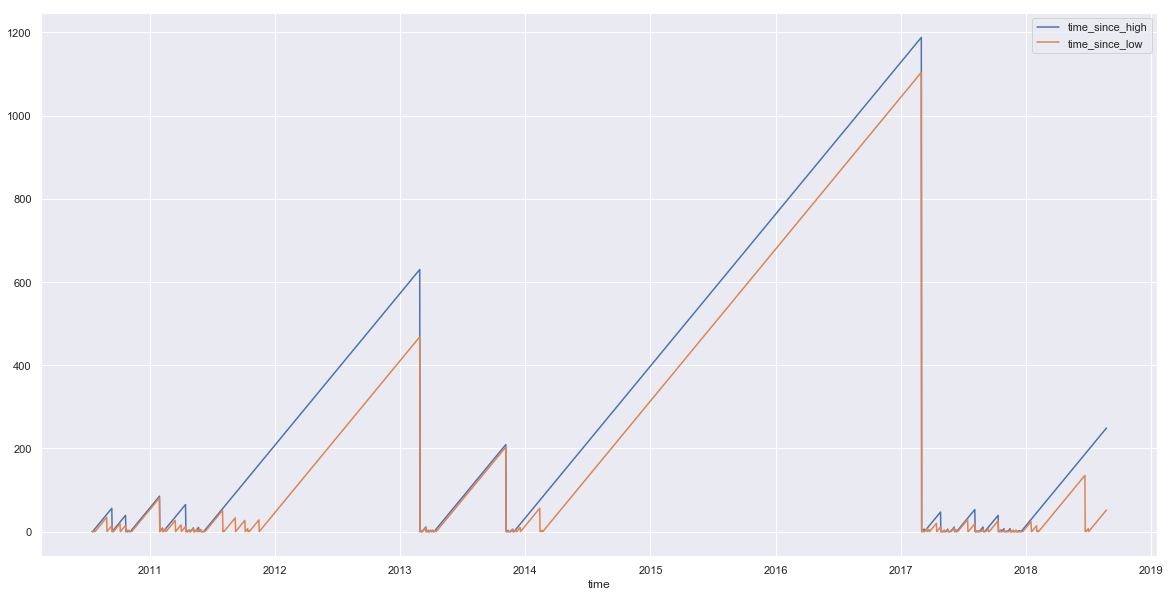

In [232]:
df[['time_since_{}'.format(p) for p in params]].plot()

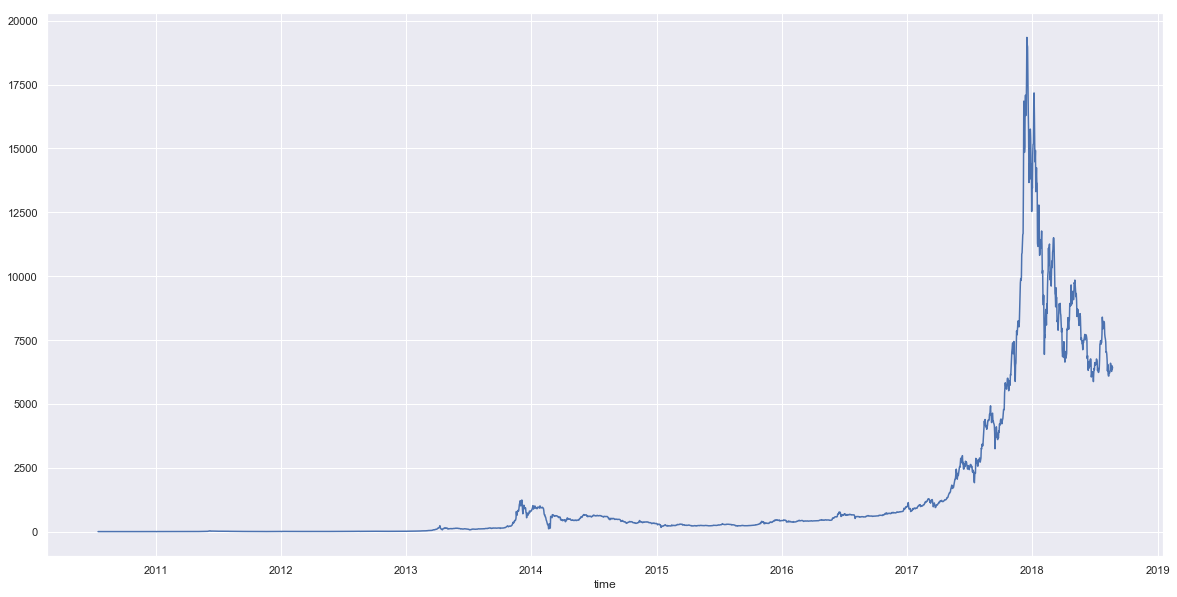

In [297]:
df.close.plot()

The graph above illustrates the frequency and length of these cycles. Where the blue triangles begin marks the height of a given cycle and an ensuing bear period.  Where the green triangles begin marks the formation of a new cycle low. 
Where both lines come down to zero together marks the start of the frenzied buying that drives the price to continual new highs until a prolonged downturn occurs, as the cycle begins to reset itself. 

The ideal periods to buy in for trend seeking traders would be immediately after the last green triangle has been formed within the larger blue triangle, that is the final low of the cylcle. The final bottom appears very soon after the all time high is formed demonstrating that prices correct early on in a cycle. In 2014 in particular, the bottom is found only a couple months after the high. We can see that there are two very prolonged cycles, where the new high was not established until years after the bottom was reached. The current cycle ....

In [4]:
a = {'a': 1, 'b': 2}
a['c']

KeyError: 'c'

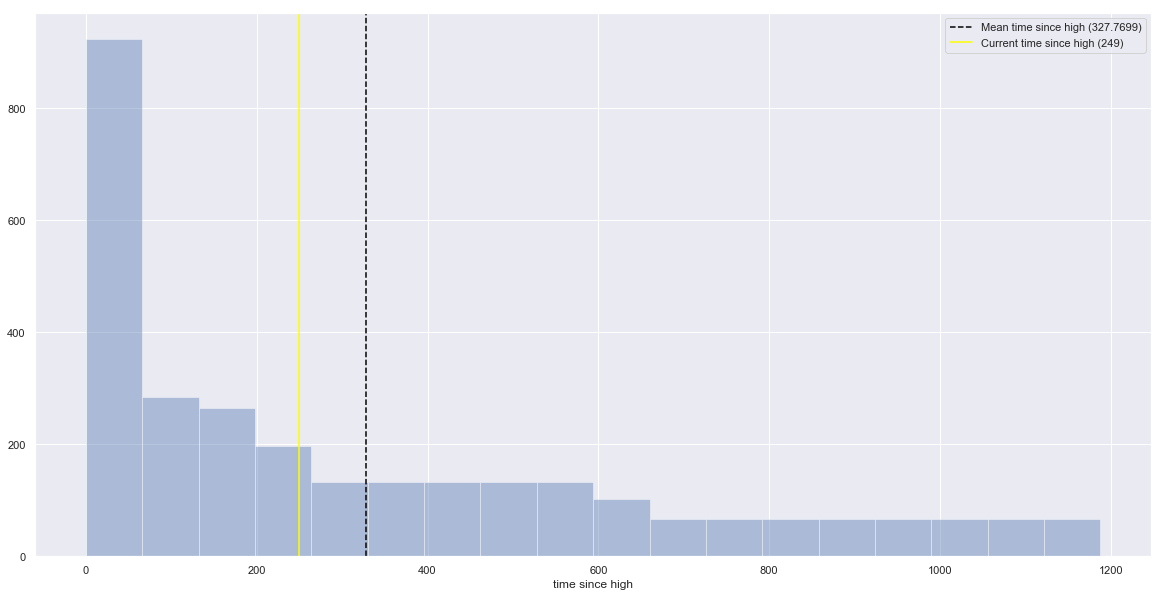

In [233]:
plot.hist(df.time_since_high, plot_last=True)

If we are expecting a new all time high to present itself within the average time that it takes for the market to turn around then we should expect another 85 days or approximately 3 months. 

What is promising is that when we look at the level of retracement from a previous all time high we are in fact much lower than the average suggesting that now might be a good time to buy. However, if you are taking the buy and hold strategy you should also be cognizant of the fact that there are periods where retracement is lower than 80% from all time high. Getting into the market at 65% retracement level only to have the market fall to an 85% retracement level would pose a loss of more than 40%. It's hard to time the market and find bottoms but it is comforting to know that at these levels of retracement the returns when the market rallys far outway the downside. 

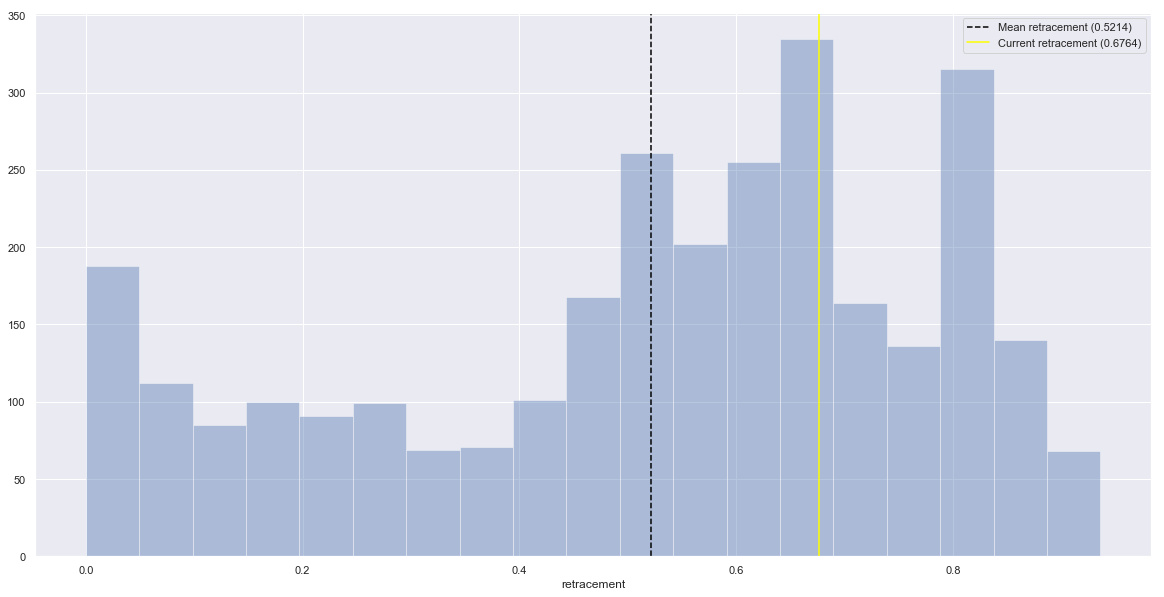

In [234]:
df['retracement'] = df.apply(lambda d: (d.cycle_high - d.close)/d.cycle_high, axis=1)
plot.hist(df.retracement, plot_last=True)

In [357]:
for param in params:
    val_param = 'cycle_' + param
    time_param = 'time_since_' + param 
    df['is_' + val_param] = ((df[val_param].diff()!=0)*1).diff()==1
    
highs_and_lows = df[df.is_cycle_high|df.is_cycle_low]
print('Number of highs and lows: {}'.format(highs_and_lows.shape[0]))

groupby_cycle = highs_and_lows.groupby('cycle_high')
groupby_year = highs_and_lows.groupby(highs_and_lows.index.year)

print('Number of cycles per year: {}'.format(groupby_year.is_cycle_high.sum().mean()))
print('Number of lows per cycle: {}'.format(groupby_cycle.is_cycle_low.sum().mean()))

Number of highs and lows: 94
Number of cycles per year: 8.5
Number of lows per cycle: 1.4516129032258065


In [432]:
hl = groupby_cycle.cycle_low.min().reset_index()
hl['high_date'] = hl.cycle_high.apply(lambda h: df[df.cycle_high==h].index[0])
hl['low_date'] = hl.cycle_low.apply(lambda l: df[df.cycle_low==l].index[0])
hl['retracement'] = (hl.cycle_low - hl.cycle_high) / hl.cycle_high
hl['time_to_bottom'] = hl.low_date - hl.high_date
hl['time_from_bottom_to_next_high'] = hl.high_date.shift(-1) - hl.low_date
hl['cycle_duration'] = hl.time_to_bottom + hl.time_from_bottom_to_next_high
hl = hl[hl.cycle_duration > timedelta(days=2)]
hl['high_to_next_high'] = (hl.cycle_high.shift(-1) - hl.cycle_high) / hl.cycle_high
hl['low_to_next_low'] = (hl.cycle_low.shift(-1) - hl.cycle_low) / hl.cycle_low
hl['low_to_next_high'] = (hl.cycle_high.shift(-1) - hl.cycle_low) / hl.cycle_low
hl = hl.reset_index().drop('index', axis=1)
hl

,cycle_high,cycle_low,high_date,low_date,retracement,time_to_bottom,time_from_bottom_to_next_high,cycle_duration,high_to_next_high,low_to_next_low,low_to_next_high
0,0.09307,0.03211,2010-07-19,2010-08-30,-0.654991,42 days,15 days,57 days,0.880305,-0.688571,4.450016
1,0.17500,0.01000,2010-09-14,2010-10-08,-0.942857,24 days,16 days,40 days,0.085714,9.800000,18.000000
2,0.19000,0.10800,2010-10-24,2010-10-24,-0.431579,0 days,4 days,4 days,0.047368,0.736111,0.842593
3,0.19900,0.18750,2010-10-30,2010-10-30,-0.057789,0 days,4 days,4 days,0.381910,-0.333333,0.466667
4,0.27500,0.12500,2010-11-03,2010-11-03,-0.545455,0 days,3 days,3 days,0.818182,0.808800,3.000000
5,0.50000,0.22610,2010-11-06,2010-11-08,-0.547800,2 days,84 days,86 days,0.900000,1.078726,3.201681
6,0.95000,0.47000,2011-01-31,2011-01-31,-0.505263,0 days,9 days,9 days,0.157895,0.195532,1.340426
7,1.10000,0.56190,2011-02-10,2011-04-04,-0.489182,53 days,13 days,66 days,0.036364,0.833066,1.028831
8,1.14000,1.03000,2011-04-17,2011-04-17,-0.096491,0 days,4 days,4 days,0.061404,0.106796,0.174757
9,1.21000,1.14000,2011-04-21,2011-04-21,-0.057851,0 days,7 days,7 days,1.190083,0.456140,1.324561


In [435]:
np.corrcoef([time])

TypeError: cannot astype a datetimelike from [datetime64[ns]] to [float64]

In [433]:
hl.describe().T

,count,mean,std,min,25%,50%,75%,max
cycle_high,50,2424.27,3686.02,0.09307,9.0075,358.745,3636.14,17399.2
cycle_low,50,2126.7,3317.44,0.01,4.2525,197.02,3356.97,15024.6
retracement,50,-0.249449,0.250593,-0.942857,-0.366588,-0.132431,-0.0766378,-0.0349306
time_to_bottom,50,9 days 11:31:12,27 days 06:23:08.121777,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,2 days 18:00:00,162 days 00:00:00
time_from_bottom_to_next_high,50,44 days 07:12:00,168 days 21:32:16.640912,2 days 00:00:00,4 days 00:00:00,6 days 12:00:00,12 days 00:00:00,1106 days 00:00:00
cycle_duration,50,53 days 18:43:12,188 days 06:45:41.927431,3 days 00:00:00,4 days 00:00:00,7 days 00:00:00,12 days 18:00:00,1189 days 00:00:00
high_to_next_high,49,0.334477,0.448324,0.00902145,0.0473684,0.147424,0.440872,2.35895
low_to_next_low,49,0.972091,2.81017,-0.867625,0.0623146,0.252141,0.527337,14.5276
low_to_next_high,49,1.76757,3.66888,0.057294,0.273361,0.514799,1.32456,18


Todo:
    - summary analysis of descriptive stats for longer cycles 

## Price Reversion

When price moves out of cycle range we expect that it will retest that range. That is to say, if a new cycle low is formed the price will momentarily revert back to previous cycle bottom and when new cycle is formed by a new all time high prices will momentarily revert back to the previous all time high. 

In general you can usually anticipate that once a new all time high has been established there is uncertainity among market participants as to whether that new price will stick. There isn't any market history at these new price levels to provide any answers so the market eventually comes back down to a more comforatable price for which there is a previous consensus, the last all time high. This doesn't always happen, but certainly a large majority of the time, particularly when the slope of the price movements become parabolic. The quicker prices rises the more uncertain old buyers (potential sellers) are that prices are sustainable and so they take profit as quickly as possible at any price above the last support level. The quicker prices fall the more interested buyers are about purchasing assets at fire sale prices, bidding them up to the resistance level.  

Todo:
 - for each ath get the pct

In [426]:
aths = df[df.cycle_high.diff(2)==0].cycle_high.value_counts().to_frame().reset_index().rename(columns={'index':'price','cycle_high':'days'})
aths.index = [df[df.cycle_high==a].sort_index().index[0] for a in aths.price]
aths = aths.sort_index()
aths['next_ath_date'] = aths.reset_index().shift(-1)['index'].values
premium = 1.05
aths['retested'] = aths.apply(lambda a: 
    df[a.next_ath_date:][df[a.next_ath_date:].low <= a.price*premium].index[0] if any(df[a.next_ath_date:].low <= a.price*premium) else None, axis=1)
pct_retested = round((~aths.retested.isnull()).sum()/aths.shape[0],4)*100
print('{}% of all time highs retested'.format(pct_retested))

95.24000000000001% of all time highs retested


In [427]:
aths['time_to_next_high'] = aths.next_ath_date - aths.index

,price,days,next_ath_date,retested,time_to_next_high
2010-07-19,0.09307,55,2010-09-14,2010-09-14,57 days
2010-09-14,0.17500,38,2010-10-24,2010-10-24,40 days
2010-10-24,0.19000,2,2010-10-30,2010-10-30,6 days
2010-10-30,0.19900,2,2010-11-03,2010-11-03,4 days
2010-11-03,0.27500,1,2010-11-06,2010-11-06,3 days
2010-11-06,0.50000,84,2011-01-31,2011-01-31,86 days
2011-01-31,0.95000,7,2011-02-10,2011-02-10,10 days
2011-02-10,1.10000,64,2011-04-18,2011-04-18,67 days
2011-04-18,1.20000,1,2011-04-23,NaT,5 days
2011-04-23,1.95000,3,2011-04-30,2011-10-19,7 days


In [441]:
aths[aths.next_ath_date!=aths.retested]

,price,days,next_ath_date,retested,time_to_next_high
2011-04-18,1.20,1,2011-04-23,NaT,5 days
2011-04-23,1.95,3,2011-04-30,2011-10-19,7 days
2011-04-30,4.15,8,2011-05-14,2011-09-09,14 days
2011-05-25,9.33,4,2011-06-08,2011-08-03,14 days
2013-03-01,34.90,1,2013-03-06,2013-03-07,5 days
2013-03-06,49.10,10,2013-03-21,2013-04-16,15 days
2013-03-28,95.70,2,2013-04-03,2013-04-12,6 days
2013-04-10,266.00,208,2013-11-09,2014-02-16,213 days
2013-11-09,394.99,2,2013-11-19,2014-02-14,10 days
2013-11-19,900.92,5,2013-11-29,2013-12-01,10 days


In [ ]:
aths.

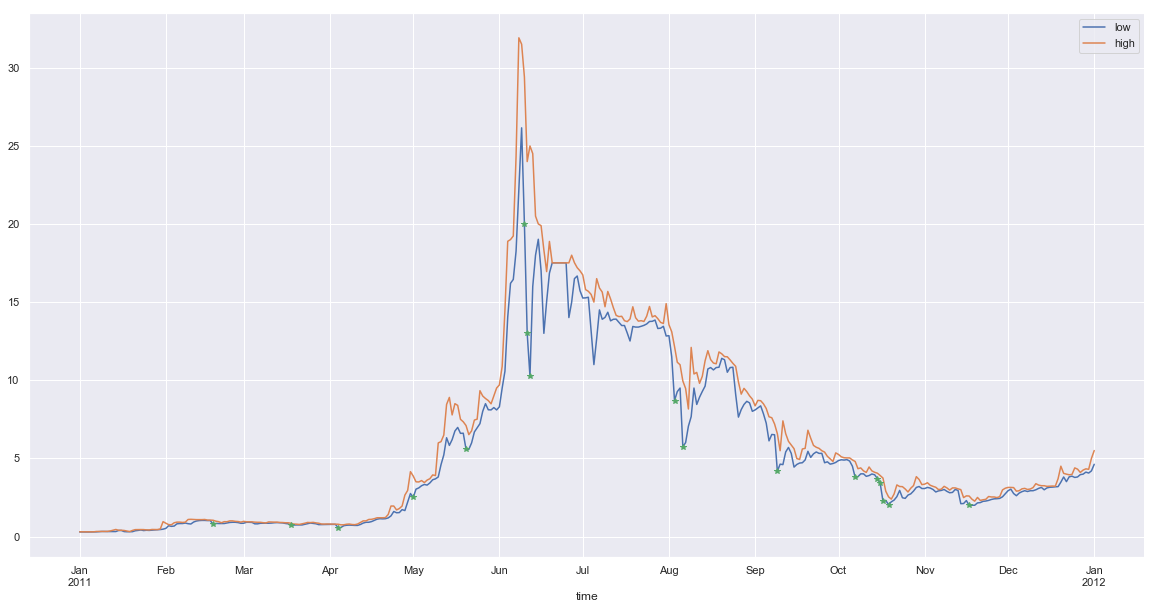

In [412]:
temp_df = df[start:end]
temp_df[['low','high']].plot()
temp_df[(df.time_since_low==0)&(df.time_since_high>0)].low.plot(marker='*', ls='')

In [ ]:
for 

In [308]:
df['last_cycle_high'] = df.apply(lambda p: df[:p.name].cycle_high.unique()[-2] if p.name != df.index.min() else p.cycle_high, axis=1)
df['last_cycle_low'] = df.apply(lambda p: df[:p.name].cycle_low.unique()[-2] if p.name != df.index.min() else p.cycle_low, axis=1)

In [263]:
df[['low','close','cycle_high','last_cycle_high','cycle_low','last_cycle_low','is_cycle_high']].head(100)

,low,close,cycle_high,last_cycle_high,cycle_low,last_cycle_low,is_cycle_high
time,,,,,,,
2010-07-17,0.04951,0.04951,0.04951,0.04951,0.04951,0.04951,False
2010-07-18,0.05941,0.08584,0.08585,0.04951,0.05941,0.04951,False
2010-07-19,0.07723,0.08080,0.09307,0.08585,0.07723,0.05941,False
2010-07-20,0.07426,0.07474,0.09307,0.08585,0.07426,0.07723,False
2010-07-21,0.06634,0.07921,0.09307,0.08585,0.06634,0.07426,False
2010-07-22,0.05050,0.05050,0.09307,0.08585,0.05050,0.06634,False
2010-07-23,0.05050,0.06262,0.09307,0.08585,0.05050,0.06634,False
2010-07-24,0.05049,0.05454,0.09307,0.08585,0.05049,0.05050,False
2010-07-25,0.05050,0.05050,0.09307,0.08585,0.05049,0.05050,False


In [310]:
start = datetime(2011,1,1)
end = datetime(2012,1,1)

Periods during mean reversion are those when:
- cycle high is reached, time_since_high > 2, 
- cycle high and low are not the same 

### Frequency

What percentage of times that range is breached does the price revert?

### Duration

In [ ]:
How long does 

### Magnitude


## Strategy

(outline generic variables of strategy) 

precision of pattern identification, how does an indicator correctly portend a 
probability_of_pattern = 
frequency_of_pattern
avg_return_from_pattern 

profitability = probability_of_pattern * frequency_of_pattern * avg_return_from_pattern 

In [ ]:


bases = pd.DataFrame()


In [ ]:


There are two simple strategies for trading these bull and bear cycles. 

* When in a bull market sell at any point after market has pushed prices to new all time highs, buy back at/or slight above previous all time high
* When in a bear market buy the first time the most recent bottom of the cycle gets breached

In [507]:
signal_cols = [
    'asset', # asset name
    'price', # significant price 
    'time', # time the price demonstrated significants
    'time_breached', # time the price was breached
    'time_retested', # time the price was retested 
    'type' # either support or resistance 
]


position_cols = [
    'asset',
    'entry_price',
    'exit_price',
    'proceeds',
    'sold',
    'cost_basis',
    'acquired',
    'opened',
    'closed',
    'gains',
    'signal',
    'live'
]

signals = pd.DataFrame(columns=signal_cols)
positions = pd.DataFrame(columns=position_cols)

In [513]:
capital = {
    'USD': 100000,
    'BTC': 0
}

snapshot = {}
order_expiration = timedelta(days=7)
future_time = datetime(2020,1,1)
simulator_steps = 1
period_gen = df[start:end].reset_index().iterrows()

In [514]:
def update_orders(period, positions):

    def update(position):
        
        cancel_order = ( # order hasn't been executed and is past expiration 
            position.closed > period.time
            and position.acquired > period.time
            and period.time - position.opened > order_expiration
        )

        fill_buy_order = ( # 
            position.closed > period.time
            and position.acquired > period.time
            and position.entry_price > period.low
        )

        fill_sell_order = (
            position.closed > period.time
            and position.acquired < period.time
            and position.exit_price < period.high
        )

        if cancel_order:
            position.closed = period.time
            if position.live:
                available_capital['USD'] += position.cost_basis

        elif fill_buy_order:
            position.acquired = period.time
            if position.live:
                capital['USD'] -= position.cost_basis
                capital['BTC'] += position.amount

        elif fill_sell_order:
            position.sold = period.time
            position.closed = period.time
            if position.live:
                available_capital['USD'] += position.proceeds
                capital['USD'] += position.proceeds
                capital[current_asset] -= position.amount

        return position

    positions = positions.apply(update, axis=1)
    return positions

def update_signals(period, signals):

    def update(signal):

        retested = (
            signal.type=='support'
            and signal.time_breached < period.time 
            and signal.time_retested > period.time
            and period.high >= signal.price 
            and period.time > signal.time
        )

        breached = (
            signal.type=='support'
            and signal.time_breached > period.time
            and signal.time_retested > period.time 
            and period.close < signal.price 
            and period.time >= signal.time
        )

        reinstated = (
            signal.type=='support'
            and period.time > signal.time_retested + timedelta(days=2)
            and period.close > signal.price
            and signal.price!= signals.price.max()
        )

        if breached:
            signal.time_breached = period.time

        elif retested:
            signal.time_retested = period.time

        elif reinstated:
            pass
            #signal.time_breached = future_time
            #signal.time_retested = future_time

        return signal

    signals = generate_signals_from_indicators(period, signals)
    signals = signals.apply(update, axis=1)
    return signals
    
def generate_signals_from_indicators(period, signals):

    conditions = {
        'resistance': (period.time_since_high == 5),
        'support': (period.time_since_low == 5),
        'ma_crossover': False,
        'spike_in_vol': False,
        'spike_in_price': False,
    }
    
    if signals.empty:
        signal_count = signals.signal_index + 1
    else:
        signal_count = 1

    for signal_name, condition_met in conditions.items():
        if condition_met:
            if signal_name=='resistance':
                price = period.high
            elif signal_name == 'support':
                price = period.low
            else:
                price = period.close
            
            signals = signals.append({
                'asset': 'BTC',
                'price': price,
                'period_info': period,
                'time': period.time,
                'time_retested': future_time,
                'time_breached': future_time,
                'signal_index': signal_count,
                'closed': future_time,
                'type': signal_name
            }, ignore_index=True)
            
            
    return signals

def update_positions(period, positions):
    signal = get_best_signal(period, signals)
    found_signal_without_position = (
        signal is not None 
        and signal.signal_index not in positions[positions.closed>period.time].signal
    )

    if found_signal_without_position:
        positions = add_positions(signal)
        
    return positions
        
def get_best_signal(period, signals,  min_bases_breached=1):
    signal = None
    signals = signals[
        (signals.time<=period.time)
        &(signals.time_breached<=period.time)
        &(signals.time_retested>period.time)
    ]

    if signals.shape[0]>= min_bases_breached:
        signal = signals.sort_values('price', ascending=True).reset_index().loc[0]

    return signal 

    def add_positions(self, signal, live=False, pct_below_base=.1):
        
        if self.entry_type == 'pct_below_base':
            entry_price = signal.price * (1 - self.pct_below_base)

        elif self.entry_type == 'prev_resistance':
            curr_period = self.periods[:self.current_time][self.current_asset]
            recent_resistance = curr_period[(curr_period.resistance==True)
                        &(curr_period.low<self.period[self.current_asset].low)
            ].sort_index(ascending=False)
            
            if recent_resistance.empty: 
                entry_price = signal.price * (1 - self.pct_below_base)
            else:
                entry_price = recent_resistance.reset_index().loc[0].close
        
        
        total_cost_basis = (self.get_buy_orders().cost_basis.sum() 
                            + self.get_sell_orders().cost_basis.sum() 
                            + self.available_capital['USD'])
        
        max_amount = self.max_buy_pct * total_cost_basis
        
        usd_outlay = max_amount if max_amount < self.available_capital['USD'] else self.available_capital['USD']
        asset_amount = usd_outlay / entry_price
        proceeds = asset_amount * signal.price
        gains = proceeds - usd_outlay
        
        if gains <= 0: 
            return
        
        # cacluate the expected performance of the base position 
        base_proceeds = usd_outlay + gains*(1-self.bullishness)
        base_amount = base_proceeds / signal.price
        base_cost_basis = base_amount * entry_price
        base_gains = base_proceeds - base_cost_basis
        
        # calculate the expected performance of the proift position which we let ride out with the market longterm
        profit_amount = asset_amount-base_amount
        profit_exit_price = signal.price* self.bull_return
        profit_proceeds = profit_amount * profit_exit_price
        profit_cost_basis = profit_amount * entry_price
        profit_gains = profit_proceeds - profit_cost_basis
        
        if live:
            self.available_capital['USD'] -= usd_outlay
        
        #base position 
        self.positions = self.positions.append({
            'amount': base_amount,
            'asset': self.current_asset,
            'entry_price': entry_price,
            'exit_price': signal.price,
            'proceeds': base_proceeds,
            'sold': self.future_time,
            'cost_basis': base_cost_basis,
            'acquired': self.future_time,
            'opened': self.current_time,
            'closed': self.future_time,
            'gains': base_gains,
            'signal': signal.signal_index,
            'live': live,
            'type': 'base'
        }, ignore_index=True)
        
        # profit position
        self.positions = self.positions.append({
            'amount': profit_amount,
            'asset': self.current_asset,
            'entry_price': entry_price,
            'exit_price': profit_exit_price,
            'proceeds': profit_proceeds,
            'sold': self.future_time,
            'cost_basis': profit_cost_basis,
            'acquired': self.future_time,
            'opened': self.current_time,
            'closed': self.future_time,
            'gains': profit_gains,
            'signal': signal.signal_index,
            'live': live,
            'type': 'profit'
        }, ignore_index=True)

In [515]:
simulator_steps = 100

In [516]:
for _ in range(simulator_steps):
    time, period = next(period_gen)
    positions = update_orders(period, positions)
    signals = update_signals(period, signals)
    positions = update_positions(period, positions)
    #port = update_port(period)

NameError: name 'add_positions' is not defined

In [492]:
positions

,asset,entry_price,exit_price,proceeds,sold,cost_basis,acquired,opened,closed,gains,signal,live


In [489]:
signals

,asset,price,time,time_breached,time_retested,type


In [476]:
btc.close.plot()
btc.loc[aths.retested].close.plot(marker='^', ls='')

NameError: name 'btc' is not defined

In [ ]:
import indicators

indicators.relative_strength_index()

In [341]:
from copy import deepcopy
from cryptocompare import get_daily_trade_hist
import os.path
import requests
import json
import pandas as pd
import numpy as np
from datetime import datetime, timedelta 
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 200
pd.options.display.max_columns = 200
sns.set(rc={"figure.figsize": (20, 10)})
import matplotlib.ticker as mticker
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

class BackTester:
    
    def __init__(self, assets, capital=1e5, 
               max_time_to_buy=timedelta(days=24), 
               min_time_to_buy=timedelta(days=1),
               max_buy_amount = 1e4,
               max_buy_pct=.15,
               sim_steps=5,
               pct_below_base=0.05,
               bullishness=0.5,
               bull_return=10,
               lookback_window=10,
               from_file=False,
               start=None, end=None,
               entry_type = 'pct_below_base',
               order_expiration=timedelta(days=7),
               min_bases_breached=1
              ):
        
        self.future_time = datetime(2030,1,1)
        
        self.start = start
        self.end = end
        
        self.main_dir = 'backtest_data'
        self.prices_dir = self.main_dir+'/prices'
        self.from_file=from_file
        
        self.assets = assets
        self.lookback_window = lookback_window
        
        self.init_capital = capital
        self.order_expiration = order_expiration
        self.entry_type = entry_type
        self.min_bases_breached = min_bases_breached
        self.max_time_to_buy = max_time_to_buy
        self.min_time_to_buy = max_buy_amount
        self.max_buy_amount = max_buy_amount
        self.max_buy_pct = max_buy_pct
        self.simulator_steps = sim_steps
        self.pct_below_base = pct_below_base
        self.bullishness = bullishness
        self.bull_return = bull_return
        self.get_price_history()
        self.get_indicators()
        self.reset()
        
    def reset(self, start=None, end=None):
        self.period_gen = self.periods[start:end].reset_index().iterrows()
        self.period = next(self.period_gen)
        port_cols = ['time', 'USD'] + self.assets
        self.port = pd.DataFrame(columns=port_cols)
        self.available_capital = {a: 0 for a in self.assets}
        self.available_capital['USD'] = self.init_capital
        self.capital = {a: 0 for a in self.assets}
        self.capital['USD'] = self.init_capital

        self.signal_count = 0
        signal_cols = [
            'asset',
            'price',
            'time',
            'time_breached',
            'time_retested',
            'type'
        ]
        self.signals = pd.DataFrame(columns=signal_cols)
        
        position_cols = [
            'asset',
            'entry_price',
            'exit_price',
            'proceeds',
            'sold',
            'cost_basis',
            'acquired',
            'opened',
            'closed',
            'gains',
            'signal',
            'live'
        ]
        self.positions = pd.DataFrame(columns=position_cols)
        
    def get_price_history(self):
        results = []
        asset_names = []
        
        if self.from_file:
            
            for dirname, dirnames, filenames in os.walk(self.prices_dir):
                # print path to all filenames.
                for filename in filenames:
                    asset = filename.split('.csv')[0]
                    if asset not in self.assets:
                        continue 
                      
                    file_path = os.path.join(dirname, filename)
                    periods = pd.read_csv(file_path, index_col=0)
                    periods.index = pd.to_datetime(periods.index, infer_datetime_format=True)
                    asset_names.append(asset)
                    results.append(periods)
                    
        else:
            for asset in self.assets:
                periods = get_daily_trade_hist(asset)
                asset_names.append(asset)
                results.append(periods)

        self.periods = pd.concat(results, axis=1, keys=asset_names)[self.start:self.end]
        
    def get_indicators(self):

        def generate_indicators(periods):
            
            periods['return'] = (periods.close - periods.open) / periods.open
            periods['type'] = ((periods['return'] > 0) * 2) -1
            periods['reversal'] = abs(periods.type.diff())==2
            """
            def rolling_indicators(period):
                
                lookback_period = periods[period.name-timedelta(days=self.lookback_window):period.name]
                open_price = lookback_period.open.values[0]
                closing_price = lookback_period.close.values[-1]
                period['rolling_avg_return'] = lookback_period['return'].mean()
                period['rolling_avg_type'] = lookback_period['type'].mean()
                period['rolling_return'] = (closing_price-open_price)/open_price
                period['rolling_avg_close'] = lookback_period['close'].mean()
                period['rolling_avg_volume'] = lookback_period['volumefrom'].mean()
                return period

            periods = periods.apply(rolling_indicators, axis=1)
            """
            return periods
            
        for asset in self.periods.columns.levels[0]:
            self.periods[asset] = generate_indicators(self.periods[asset])
        
    def run(self):
        
        for _ in range(self.simulator_steps):
            try:
                _, self.period = next(self.period_gen)
            except:
                break
                                         
            self.current_time = datetime.fromtimestamp(self.period.time.values[0].astype(datetime)/1e9)
            
            for asset in self.assets:
                self.current_asset = asset
                self.update_orders()
                self.update_signals()
                self.update_positions()

            self.update_port()
            
    def update_orders(self):
        
        def update(position):
            if position.asset != self.current_asset:
                return position 
            
            cancel_order = (
                position.closed>self.current_time
                and position.acquired > self.current_time
                and self.current_time - position.opened > self.order_expiration
            )
            
            fill_buy_order = (
                position.closed>self.current_time
                and position.acquired > self.current_time
                and position.entry_price > self.period[self.current_asset].low
            )

            fill_sell_order = (
                position.closed>self.current_time
                and position.acquired < self.current_time
                and position.exit_price < self.period[self.current_asset].high
            )

            if cancel_order:
                position.closed = self.current_time
                if position.live:
                    self.available_capital['USD'] += position.cost_basis
                
            elif fill_buy_order:
                position.acquired = self.current_time
                if position.live:
                    self.capital['USD'] -= position.cost_basis
                    self.capital[self.current_asset] += position.amount

            elif fill_sell_order:
                position.sold = self.current_time
                position.closed = self.current_time
                if position.live:
                    self.available_capital['USD'] += position.proceeds
                    self.capital['USD'] += position.proceeds
                    self.capital[self.current_asset] -= position.amount
                
            return position
         
        self.positions = self.positions.apply(update, axis=1)
            
    def update_signals(self):
        
        def update(signal):
            if signal.asset != self.current_asset:
                return signal
            
            retested = (
                signal.type=='support'
                and signal.time_breached < self.current_time 
                and signal.time_retested > self.current_time
                and self.period[self.current_asset].high >= signal.price 
                and self.current_time > signal.time
            )
            
            breached = (
                signal.type=='support'
                and signal.time_breached > self.current_time
                and signal.time_retested > self.current_time 
                and self.period[self.current_asset].close < signal.price 
                and self.current_time >= signal.time
            )

            reinstated = (
                signal.type=='support'
                and self.current_time > signal.time_retested + timedelta(days=2)
                and self.period[self.current_asset].close > signal.price
                and signal.price!= self.signals.price.max()
            )
            
            if breached:
                signal.time_breached = self.current_time
            
            elif retested:
                signal.time_retested = self.current_time
 
            elif reinstated:
                pass
                #signal.time_breached = self.future_time
                #signal.time_retested = self.future_time

            return signal
            
        self.generate_signals_from_indicators()
        self.signals = self.signals.apply(update, axis=1)
        
    def generate_signals_from_indicators(self):
        period = self.period[self.current_asset]
        
        signals = {
            'resistance': (
                (period.type==-1)
                 & (period['return']< 0)
                 & ((period['rolling_avg_return'] > 0) & (period['rolling_avg_type'] > 0))
                 & (period['reversal'])
            ),
            'support':(
                (period.type==1) 
                 & (period['return']> 0)
                 & ((period['rolling_avg_return'] < 0) &(period['rolling_avg_type'] < 0))
                 & (period['reversal'])
            ),
            'ma_crossover': (
                False
            ),
            'spike_in_vol': (
                False
            ),
            'spike_in_price': (
                False
            )
        }
        
        for signal_name, condition_met in signals.items():
            if condition_met:
                self.add_signal(signal_name)
                
    
    def add_signal(self, signal_type):
        period = self.period[self.current_asset]
        
        
        if signal_type=='resistance':
            price = period.high
        elif signal_type == 'support':
            price = period.low
        else:
            price = period.close
            
        self.signal_count += 1
        self.signals = self.signals.append({
            'asset': self.current_asset,
            'price': price,
            'period_info': period,
            'time': self.current_time,
            'time_retested': self.future_time,
            'time_breached': self.future_time,
            'signal_index': self.signal_count,
            'closed': self.future_time,
            'type': signal_type
        }, ignore_index=True)
    
    
                
    def update_positions(self):
        signal = self.get_best_signal()
        found_signal_without_position = (
            signal is not None 
            and signal.signal_index not in self.positions[self.positions.closed>self.current_time].signal
        )
        
        if found_signal_without_position:
            self.add_positions(signal)
                
    def get_best_signal(self):
        signal = None
        signals = self.signals[
            (self.signals.asset==self.current_asset)
            &(self.signals.time<=self.current_time)
            &(self.signals.time_breached<=self.current_time)
            &(self.signals.time_retested>self.current_time)
        ]
        
        if signals.shape[0]>= self.min_bases_breached:
            signal = signals.sort_values('price', ascending=True).reset_index().loc[0]

        return signal 
                
    def add_positions(self, signal, live=False, pct_below_base=.1):
        
        if self.entry_type == 'pct_below_base':
            entry_price = signal.price * (1 - self.pct_below_base)

        elif self.entry_type == 'prev_resistance':
            curr_period = self.periods[:self.current_time][self.current_asset]
            recent_resistance = curr_period[(curr_period.resistance==True)
                        &(curr_period.low<self.period[self.current_asset].low)
            ].sort_index(ascending=False)
            
            if recent_resistance.empty: 
                entry_price = signal.price * (1 - self.pct_below_base)
            else:
                entry_price = recent_resistance.reset_index().loc[0].close
        
        
        total_cost_basis = (self.get_buy_orders().cost_basis.sum() 
                            + self.get_sell_orders().cost_basis.sum() 
                            + self.available_capital['USD'])
        
        max_amount = self.max_buy_pct * total_cost_basis
        
        usd_outlay = max_amount if max_amount < self.available_capital['USD'] else self.available_capital['USD']
        asset_amount = usd_outlay / entry_price
        proceeds = asset_amount * signal.price
        gains = proceeds - usd_outlay
        
        if gains <= 0: 
            return
        
        # cacluate the expected performance of the base position 
        base_proceeds = usd_outlay + gains*(1-self.bullishness)
        base_amount = base_proceeds / signal.price
        base_cost_basis = base_amount * entry_price
        base_gains = base_proceeds - base_cost_basis
        
        # calculate the expected performance of the proift position which we let ride out with the market longterm
        profit_amount = asset_amount-base_amount
        profit_exit_price = signal.price* self.bull_return
        profit_proceeds = profit_amount * profit_exit_price
        profit_cost_basis = profit_amount * entry_price
        profit_gains = profit_proceeds - profit_cost_basis
        
        if live:
            self.available_capital['USD'] -= usd_outlay
        
        #base position 
        self.positions = self.positions.append({
            'amount': base_amount,
            'asset': self.current_asset,
            'entry_price': entry_price,
            'exit_price': signal.price,
            'proceeds': base_proceeds,
            'sold': self.future_time,
            'cost_basis': base_cost_basis,
            'acquired': self.future_time,
            'opened': self.current_time,
            'closed': self.future_time,
            'gains': base_gains,
            'signal': signal.signal_index,
            'live': live,
            'type': 'base'
        }, ignore_index=True)
        
        # profit position
        self.positions = self.positions.append({
            'amount': profit_amount,
            'asset': self.current_asset,
            'entry_price': entry_price,
            'exit_price': profit_exit_price,
            'proceeds': profit_proceeds,
            'sold': self.future_time,
            'cost_basis': profit_cost_basis,
            'acquired': self.future_time,
            'opened': self.current_time,
            'closed': self.future_time,
            'gains': profit_gains,
            'signal': signal.signal_index,
            'live': live,
            'type': 'profit'
        }, ignore_index=True)
        
    def save(self):
        
        if not os.path.exists(self.main_dir):
            os.mkdir(self.main_dir)
            
        if not os.path.exists(self.prices_dir):
            os.mkdir(self.prices_dir)

        for asset in self.assets:
            self.periods[asset].to_csv(self.prices_dir+'/'+asset+'.csv')
                
        
    def get_position_duration(self):
        pass
    
    def get_open_orders(self, asset=None):
        if asset is None:
            return self.positions[(self.positions.self.current_time)]
        else:
            return self.positions[(self.positions.closed<=self.current_time)&(self.positions.asset==asset)]
    
    def get_buy_orders(self):
        return self.positions[
            (self.positions.closed>self.current_time)
            &(self.positions.acquired>self.current_time)
        ]
    
    def get_sell_orders(self): 
        return self.positions[
            (self.positions.closed>self.current_time)
            &(self.positions.acquired<=self.current_time)
            &(self.positions.sold>self.current_time)
        ]
    
    def get_value_of_sell_orders(self):
        sells = self.get_sell_orders()
        sells['current_value'] = sells.apply(lambda s:  (s.amount * self.periods[s.asset].ix[self.current_time].close), axis=1)
        return sells.current_value.sum()
    
    def get_realized_positions(self):
        return self.positions[
            (self.positions.closed<=self.current_time)
            &(self.positions.acquired<=self.current_time)
            &(self.positions.sold<=self.current_time)
        ]
    
    def get_portfolio_value(self):
        return self.available_capital['USD'] + self.get_value_of_sell_orders() + self.get_buy_orders().cost_basis.sum()
    
    def get_retested_signals(self):
        return self.signals[self.signals.time_retested<=self.current_time]
    
    def get_breached_signals(self):
        return self.signals[self.signals.time_breached<=self.current_time]
    
    def update_port(self):
        self.capital['time'] = self.current_time
        self.port = self.port.append(self.capital, ignore_index=True)

        
   
    def get_equity_curve(self):
        
        def get_port_value(port):
            total = 0 
            for asset in self.assets:
                total += port[asset] * self.periods[asset].ix[port.time].close

            return total
        
        self.port['values'] = self.port.apply(get_port_value, axis=1)
            
    
    def plot(self, bar_width=0.4, start=None, end=None, show_port=False, only_current_steps=False, **kwds):
        
        market_count = len(self.assets)
        h_price_chart = 7
        fig_height = h_price_chart*market_count
        
        fig, price_axes = plt.subplots(market_count, sharex=True, figsize=(20,fig_height))
        
        if market_count==1:
            price_axes = [price_axes]
        
        start = self.periods.index.min() if start is None else start
        end = self.current_time if end is None else end
        
        for asset, price_ax in zip(self.assets, price_axes):
            # candelstick 
            price_ax.set_title(asset)
            curr_period = self.periods[start:end][asset]
            df_ohlc = curr_period.reset_index()
            df_ohlc = df_ohlc[["time","open","high",'low',"close", "volumeto"]]
            df_ohlc['time'] = df_ohlc['time'].map(mdates.date2num)
            candlestick_ohlc(price_ax, df_ohlc.values, width=bar_width, colorup='g', colordown='k',alpha=0.75)
            price_ax.xaxis_date()
            
            signals = self.signals[(self.signals.asset==asset)].set_index('time')[start:end]

            if 'resistance' in kwds: 
                resistance =  signals[signals.type=='resistance']
                if not resistance.empty:
                    resistance.index = resistance.index.map(mdates.date2num)
                    if kwds['resistance'] == 'circle':
                        resistance.price.plot(ax=price_ax, linestyle='', marker='o', color='black', label='resistance')
                    elif kwds['resistance'] == 'line':
                        for i, signal in resistance.iterrows():
                            price_ax.axhline(signal.price, color='#ec4949', alpha=.4)

            if 'support' in kwds:
                support = signals[signals.type=='support']
                if not support.empty:
                    support.index = support.index.map(mdates.date2num)
                    if kwds['support'] == 'circle':
                        support.price.plot(ax=price_ax, linestyle='', marker='o', color='orange', label='support')
                    elif kwds['support'] == 'line':
                        for i, signal in support.iterrows():
                            if signal.time_retested < self.current_time:
                                price_ax.axhline(signal.price, linestyle='-.', color='r', alpha=0.3, label='Retested base')
                            elif signal.time_breached < self.current_time:
                                price_ax.axhline(signal.price, linestyle=':', color='g', alpha=0.3, label='Breached base')
                            else:
                                price_ax.axhline(signal.price, alpha=0.5, label='Unbreached base')

            if 'positions' in kwds:
                positions = self.positions[self.positions.asset==asset]
                if not positions.empty:
                    buys = positions.set_index('acquired')[start:end]
                    buys.index = buys.index.map(mdates.date2num)
                    sells = positions.set_index('sold')[start:end]
                    if kwds['filled_orders'] == 'arrows':
                        price_ax.plot(buys.index, buys.entry_price, linestyle='', marker='^', alpha=1, color='w', label='Buy')
                        price_ax.plot(sells.index, sells.exit_price, linestyle='', marker='v', alpha=1, color='w', label='Sell')
                        
            
            if 'orders' in kwds:
                pass
            


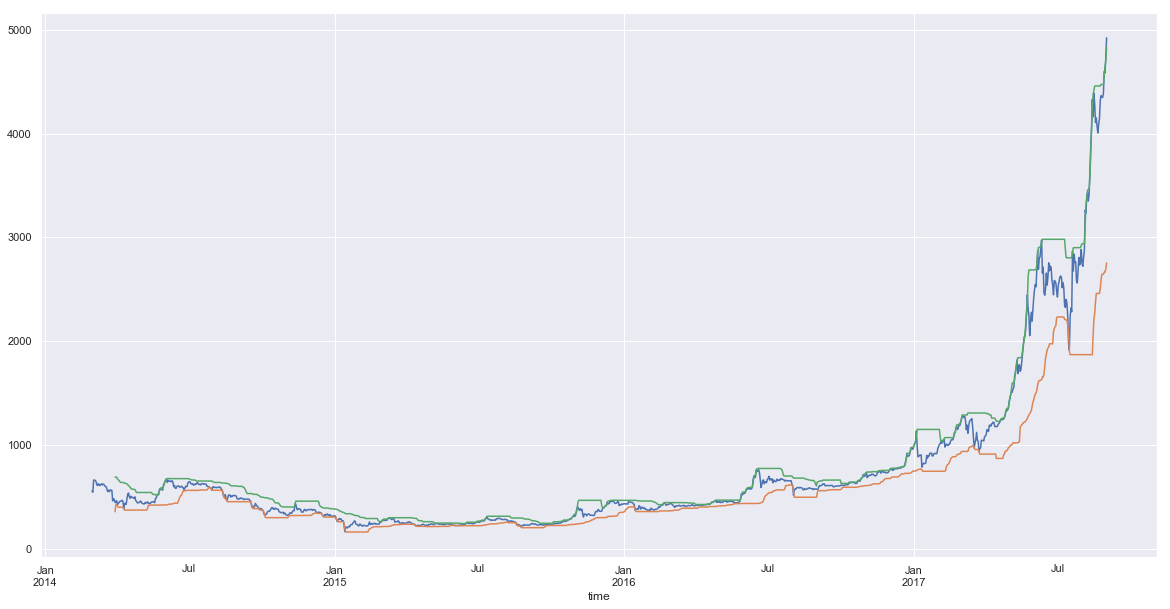

In [394]:
temp = df[datetime(2014,3,1):datetime(2017,9,1)]
temp.close.plot()
temp.low.rolling(30).quantile(.02).plot()
temp.high.rolling(30).quantile(.98).plot()
